In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

data.columns = ['Date', 'Demand']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data.head()


,Demand
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


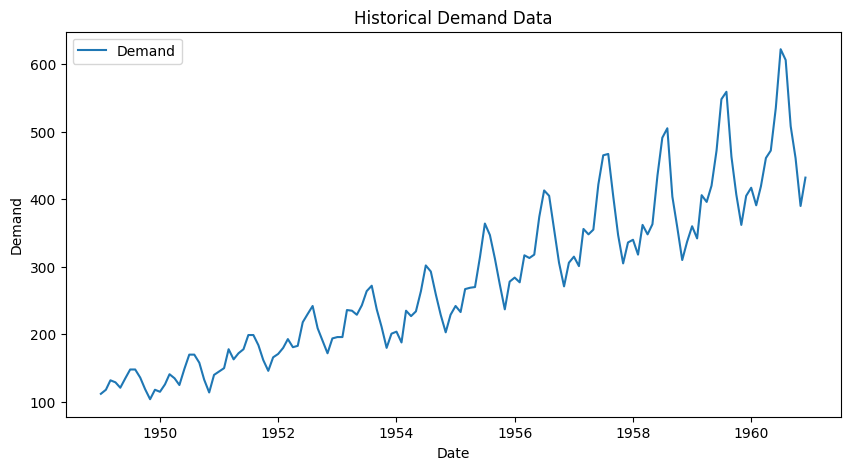

In [6]:
plt.figure(figsize=(10,5))
plt.plot(data, label='Demand')
plt.title("Historical Demand Data")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.show()


In [7]:
train = data[:-12]   # training data
test = data[-12:]    # testing data


In [8]:
arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=12)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(12)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


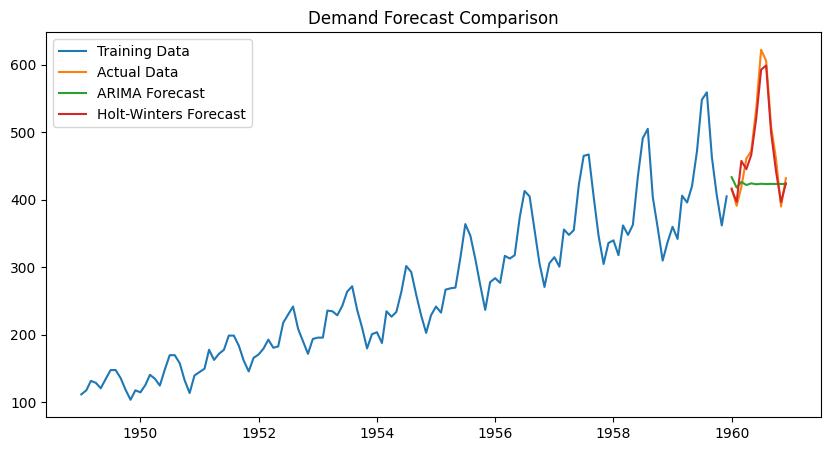

In [10]:
plt.figure(figsize=(10,5))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.plot(hw_forecast, label='Holt-Winters Forecast')
plt.legend()
plt.title("Demand Forecast Comparison")
plt.show()


In [14]:
print("ARIMA MAE:", mean_absolute_error(test, arima_forecast))
print("ARIMA RMSE:", np.sqrt(mean_squared_error(test, arima_forecast)))

print("Holt-Winters MAE:", mean_absolute_error(test, hw_forecast))
print("Holt-Winters RMSE:", np.sqrt(mean_squared_error(test, hw_forecast)))

ARIMA MAE: 66.24167467277367
ARIMA RMSE: 91.2288394211585
Holt-Winters MAE: 13.38216229071917
Holt-Winters RMSE: 16.98106818357396
